In [22]:
%matplotlib inline

In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


Using TensorFlow backend.


In [4]:

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.0272066412056
Test accuracy: 0.9907


In [3]:
model.save("mnist.h5")

In [6]:
model.save_weights("mnist_cnn_weights.h5")

In [16]:
from scipy import ndimage

In [9]:
from glob import glob

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [2]:
from keras import models

In [6]:
model = models.load_model("mnist.h5")

In [17]:
import skimage

In [24]:
from skimage.transform import resize
from skimage.color import rgb2gray

In [21]:
import matplotlib.pyplot as plt

In [25]:
rgb2gray

In [29]:
gray = resize(rgb2gray(img), (img_rows, img_cols)).reshape((img_rows, img_cols, 1))

/home/chenxi/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [36]:
plt.get_cmap('gray')

In [41]:
import numpy as np
import cv2

In [40]:
(gray * 255).astype(np.int32).shape

(28, 28, 1)

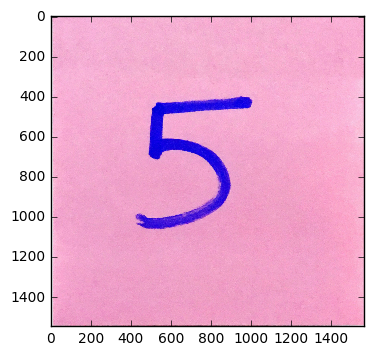

In [46]:
from skimage import io

In [54]:
resize?

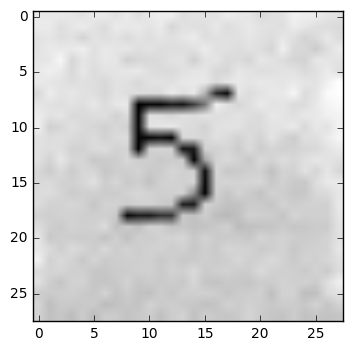

In [55]:
plt.imshow(, cmap='gray')

In [76]:
resized.reshape((1, 28, 28, 3)).shape

(1, 28, 28, 3)

In [84]:
x_train[0].shape

(28, 28, 1)

In [89]:
gray_resized.shape

(28, 28)

In [120]:
p = gray_resized[np.newaxis, :, :, np.newaxis]

In [121]:
model.predict_classes(p)

1/1 [==============================] - 0s


array([8])

In [129]:
fnames = glob("imgs/*.png")

In [131]:
fnames

['imgs/88.png',
 'imgs/81.png',
 'imgs/127.png',
 'imgs/31.png',
 'imgs/71.png',
 'imgs/9.png']

In [146]:
for f in jpg_files:
    img = io.imread(f)
    gray = rgb2gray(img)[:,:,np.newaxis]
    resized = resize(gray, (img_rows, img_rows), mode='reflect')
    res
#     gray_resized = resize(rgb2gray(img), (img_rows, img_rows), mode='reflect')
    p = resized[np.newaxis, :, :, :]
    print(model.predict_classes(p, batch_size=1, verbose=0))

[8]
[8]
[9]
[8]
[8]
[8]


In [ ]:
-(rgb2gray(img) - 1)

In [151]:
def mask(img, t):
    img[img < t] = 0
    return img

(1625, 1648, 1)

In [163]:
for c in range(3):
    img[:,:,c][rgb2gray(img[:,:,c]) * 255 < 240]

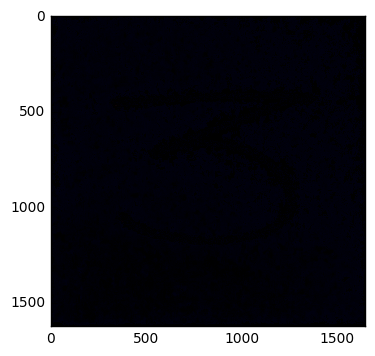

In [167]:
plt.imshow(img)

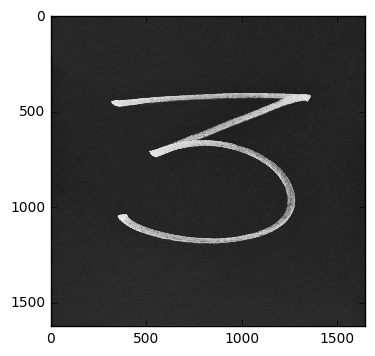

In [170]:
img = io.imread(f)
plt.imshow(-(rgb2gray(img) - 1), cmap='gray')

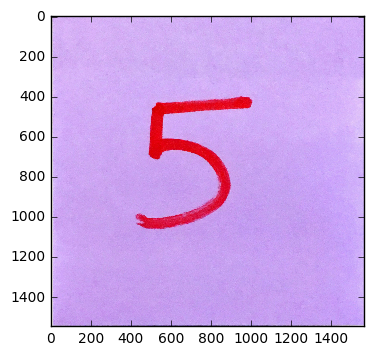

In [142]:
plt.imshow(io.imread(f))

In [29]:
rgb2gray(img).reshape((img.shape[0], img.shape[1], 1))

(1547, 1565, 1)